# Proyecto Python - Dataset Scrapy


### Realizado por: Bolívar Andrés Román

Para el presente proyecto, se han extraído datos de la página que contiene información sobre las películas más aclamadas de todos los tiempos: Internet Movie Database o por sus siglas en inglés IMDb. Se extrajo información sobre el top 1000 de películas más famosas según esta página recogiendo la información: 

* name = nombre de la película
* year = año de lanzamiento de la película
* rated = categoría de público asignada a la película
* duration_min = duración de la película en minutos
* genre = género principal de la película
* rating = calificación de la película dada por los usuarios de IMDb
* metascore = calificación asignada a la película por IMDb
* director = director de la película
* votes = número de votos que la película ha tenido para su rating

La información que contiene este dataset fue extraída del siguiente [link](https://www.imdb.com/search/title/?count=100&groups=top_1000). 

El código fuente para la extracción de la información se encuentra en este repositorio, el nombre de la araña de Scrapy es **_movie_spyder_**. La página de donde se extrajo la información recibe como parámetro el número inicial del ítem y muestra 50 resultados a partir de este número, para acceder a las 1000 películas se definió un arreglo desde 1 hasta 1000 en pasos de 50, de esta manera se cubre todo el rango de películas, luego se formatea la URL que recibe este parámetro con cada uno de estos valores y se extrae la información de cada una de estas páginas.

Para ejecutar esta araña y obtener el conjunto de datos que se menciona anteriormente, ubicarse en el directorio del proyecto y ejecutar _scrapy crawl movie_spyder_ esta sentencia extraerá la información y la guardará en un archivo con nombre _data.csv_

## Carga de datos

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

path = r'C:\Users\Bolivar Roman\Documents\7mo semestre\Python\py-roman-cabrera-bolivar-andres\proyecto - scrapy 2B\movies\movies\data.csv'

columns = ['name','year','rated','duration_min','genre','rating','metascore','director','votes']
df = pd.read_csv(path, usecols = columns)

### 1) Películas por categoría de público
Se muestra el número de películas del total agrupadas según su categoría de público. De un total de 14 categorías solo se muestran 7 para mejor claridad en el gráfico.

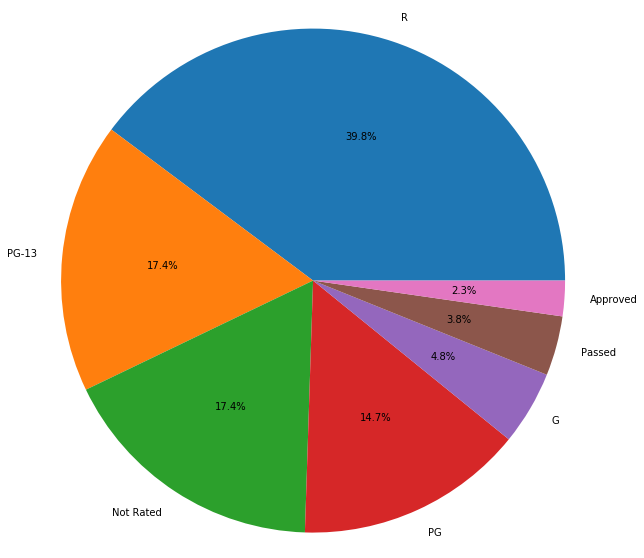

In [2]:
ratings = df['rated'].value_counts().head(7)
fig_1 = plt.figure(figsize=(10,10))
plt.pie(ratings, labels= ratings.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### 2) Películas por duración en un intervalo de minutos
Se muestra el número de películas del total agrupadas según su duración. Se agrupan los datos en rangos de 60 a 90, 90 a 120 y 120 a 150

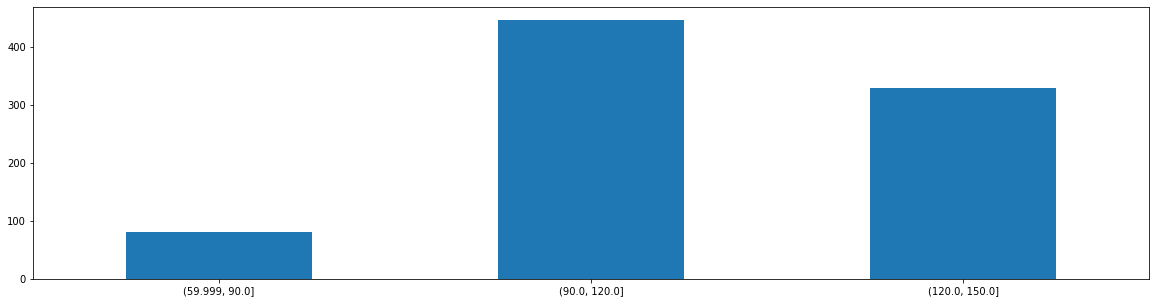

In [3]:
bins = [60,90,120,150]
times = pd.cut(df['duration_min'], bins=bins, include_lowest=True)
ax = times.value_counts(sort=False).plot.bar(rot=0, figsize=(20,5))
plt.show()

### 3) Películas por año de lanzamiento
Número de películas por año de lanzamiento.

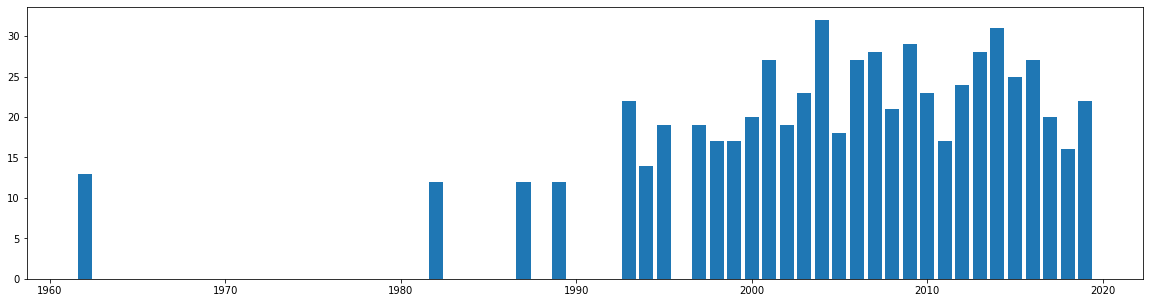

In [4]:
years = df['year'].value_counts().head(30).sort_index()
fig_3 = plt.figure(figsize=(20,5))
plt.bar(years.index , years.values)
plt.show()

### 4) Películas por director
Número de películas por director

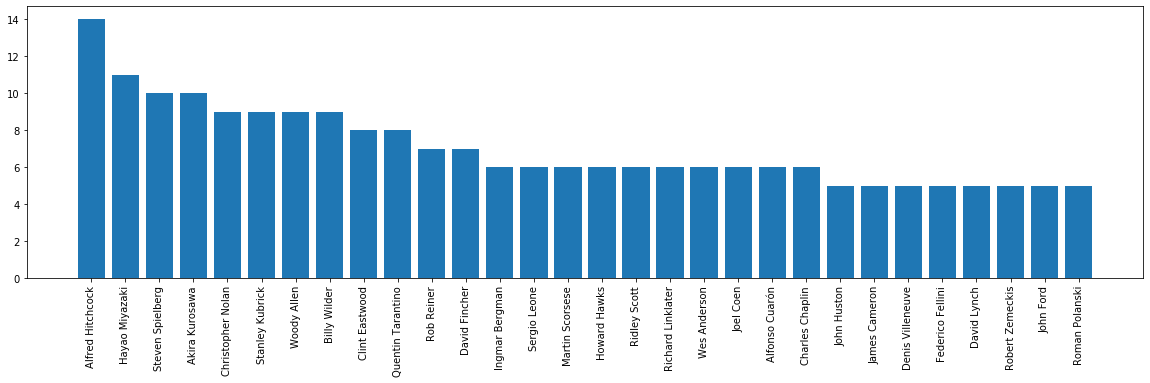

In [5]:
directors = df['director'].value_counts().head(30)
fig_4 = plt.figure(figsize=(20,5))
plt.bar(directors.index , directors.values)
plt.xticks(rotation=90)
plt.show()

### 5) Top 10 de películas más votadas
Películas ordenadas según los votos de los usuarios

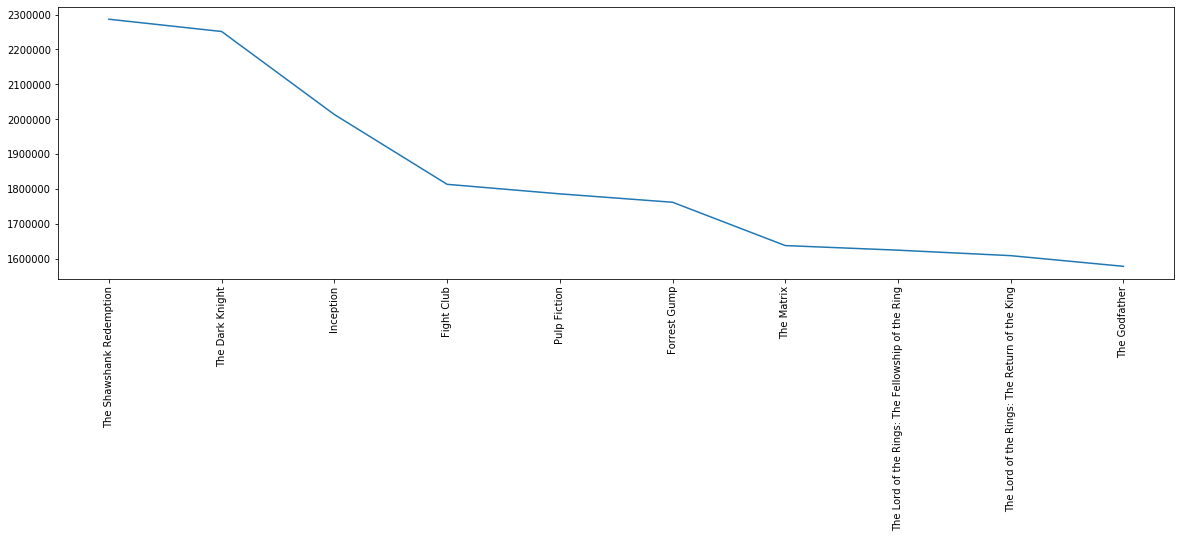

In [6]:
votes = df['votes'].sort_values(ascending=False).head(10)
names = df['name'].iloc[votes.index]
fig_5 = plt.figure(figsize=(20,5))
plt.plot(names.values , votes.values)
plt.xticks(rotation=90)
plt.show()

### 6) Top 10 de películas menos votadas
Películas ordenadas según los votos de los usuarios

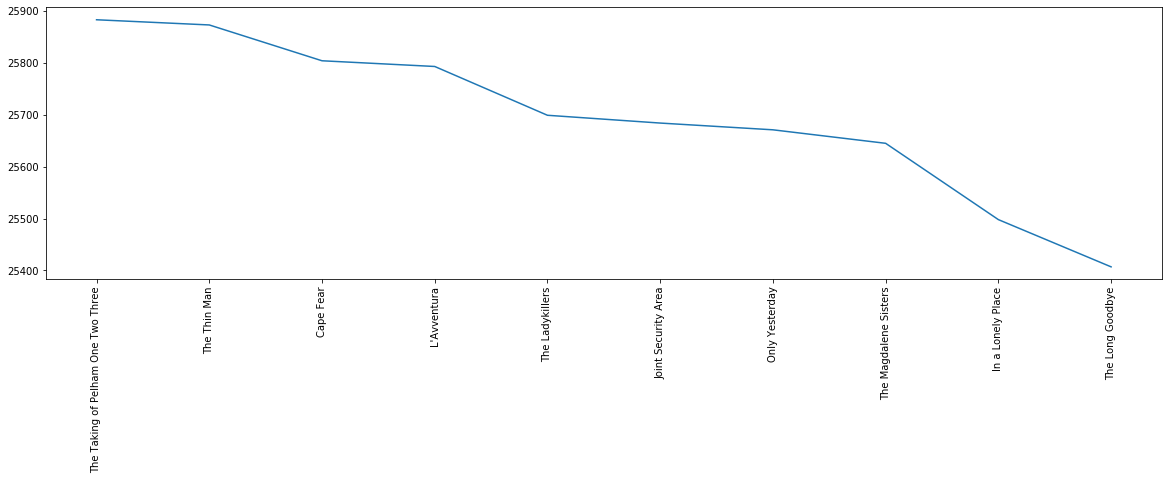

In [7]:
votes = df['votes'].sort_values(ascending=False).tail(10)
names = df['name'].iloc[votes.index]
fig_6 = plt.figure(figsize=(20,5))
plt.plot(names.values , votes.values)
plt.xticks(rotation=90)
plt.show()

### 7) Top 10 de películas mejor rankeadas
Películas ordenadas según el ranking de IMDb

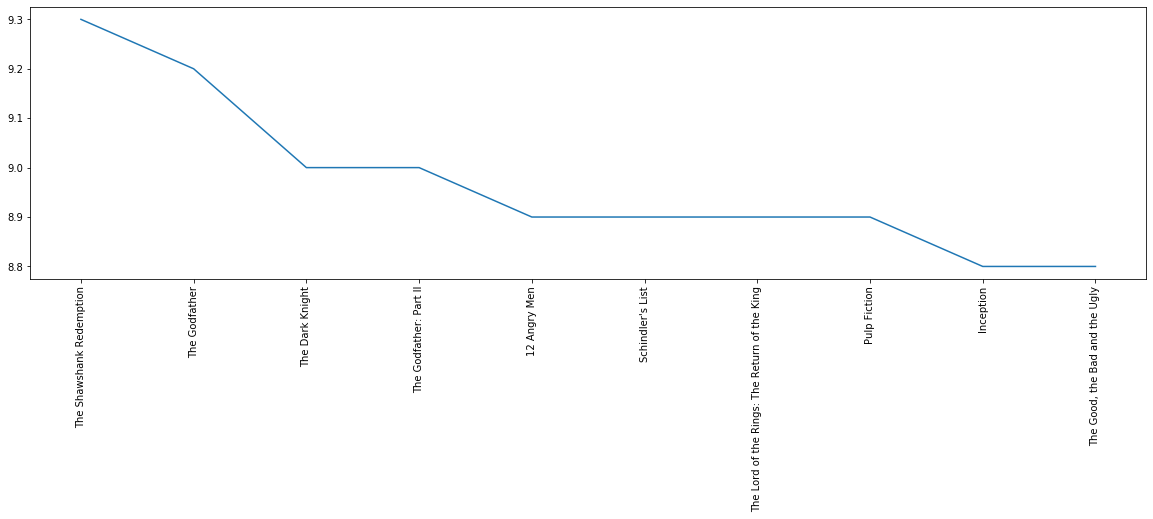

In [8]:
rating_best = df['rating'].sort_values(ascending=False).head(10)
names = df['name'].iloc[rating_best.index]

fig_7 = plt.figure(figsize=(20,5))
plt.plot(names.values , rating_best.values)
plt.xticks(rotation=90)
plt.show()

### 8) Top 10 de películas peor rankeadas
Películas ordenadas según el ranking de IMDb

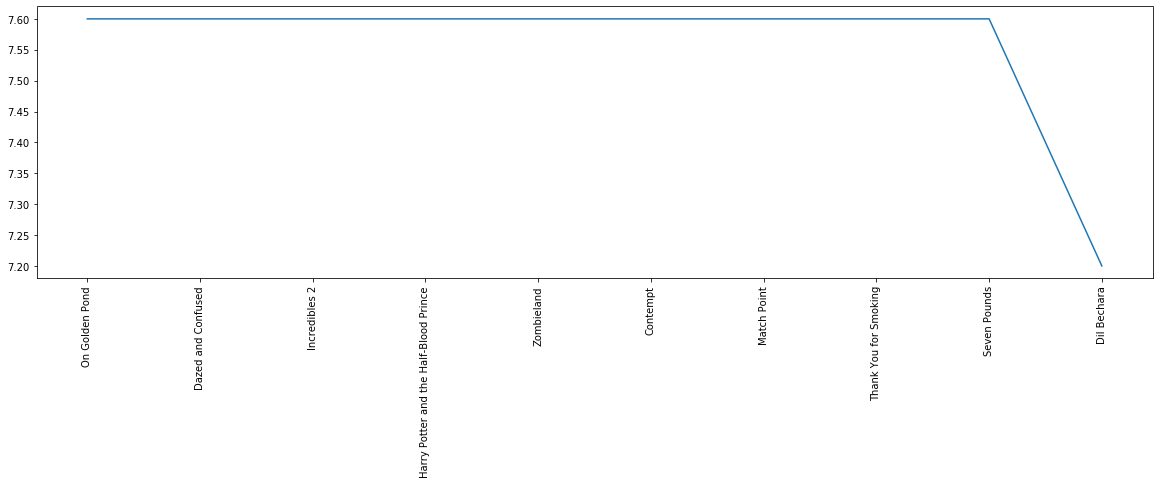

In [9]:
rating_worse = df['rating'].sort_values(ascending=False).tail(10)
names = df['name'].iloc[rating_worse.index]

fig_8 = plt.figure(figsize=(20,5))
plt.plot(names.values , rating_worse.values)
plt.xticks(rotation=90)
plt.show()

### 9) Top 20 de mejores películas por metascore
Películas ordenadas según el metascore de IMDb

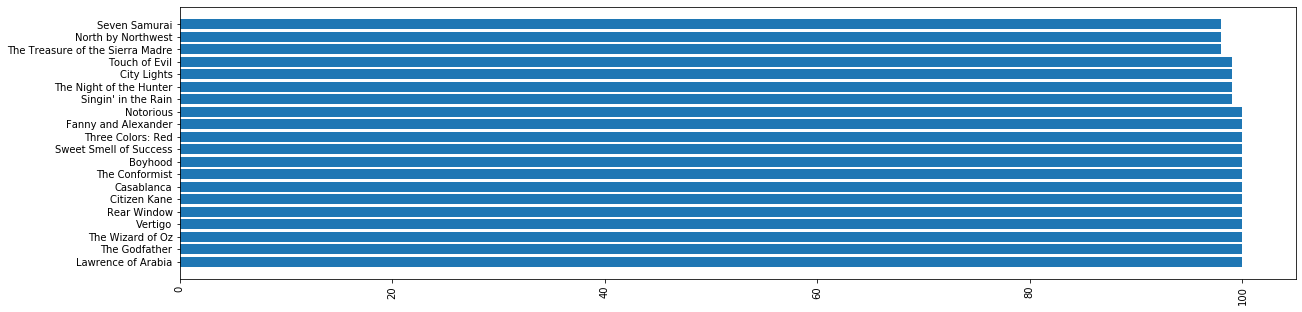

In [10]:
metascore_best = df['metascore'].sort_values(ascending=False).head(20)
names = df['name'].iloc[metascore_best.index]

fig_9 = plt.figure(figsize=(20,5))
plt.barh(names.values , metascore_best.values)
plt.xticks(rotation=90)
plt.show()

### 10) Top 20 de peores películas por metascore
Películas ordenadas según el metascore de IMDb, no se muestra variación entre los valores dado que las películas con valor más bajo tienen calificación 0

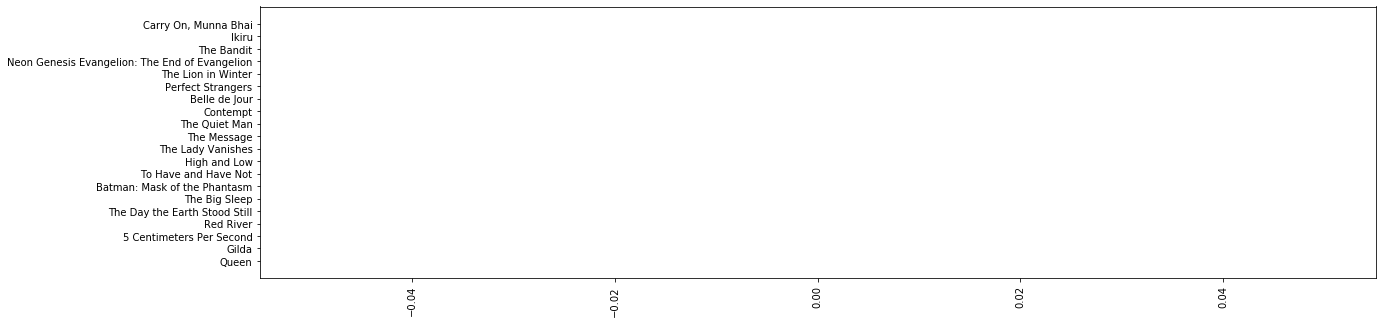

In [11]:
metascore_worse = df['metascore'].sort_values(ascending=False).tail(20)
names = df['name'].iloc[metascore_worse.index]

fig_10 = plt.figure(figsize=(20,5))
plt.barh(names.values , metascore_worse.values)
plt.xticks(rotation=90)
plt.show()

### 11) Número de películas agrupadas por metascore
Conteo de películas según el rango de metascore

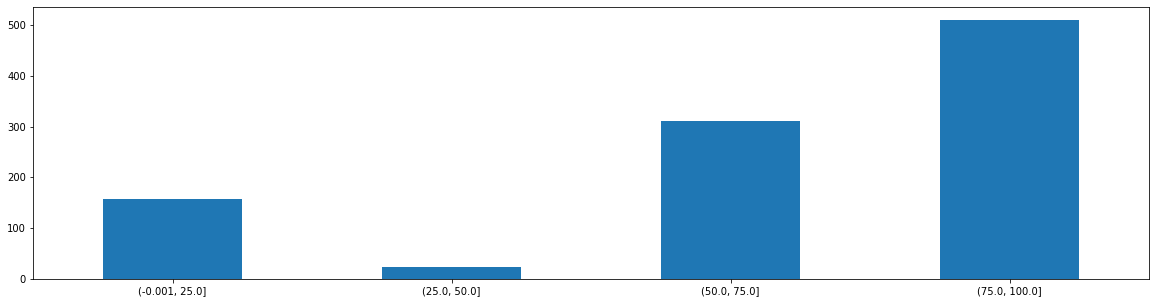

In [12]:
bins = [0,25,50,75,100]
times = pd.cut(df['metascore'], bins=bins, include_lowest=True)
ax = times.value_counts(sort=False).plot.bar(rot=0, figsize=(20,5))
plt.show()

### 12) Número de películas agrupadas por año
Conteo de películas según un intervalo de año

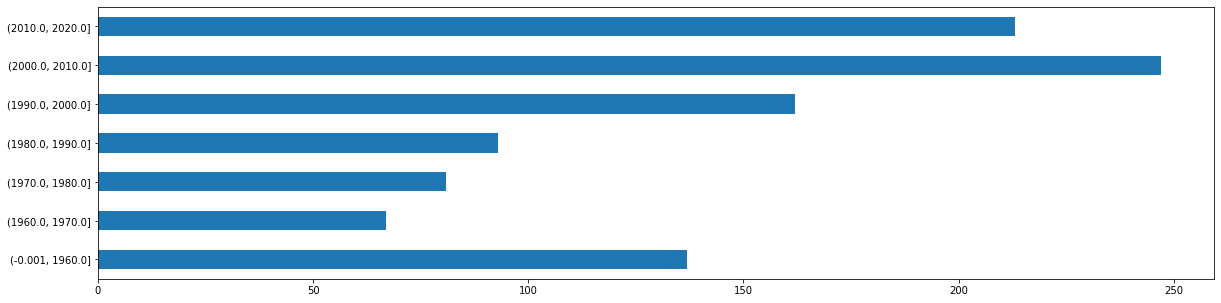

In [13]:
bins_yr = [0,1960,1970,1980,1990,2000,2010,2020]
yrs = pd.cut(df['year'], bins=bins_yr, include_lowest=True)
ax = yrs.value_counts(sort=False).plot.barh(rot=0, figsize=(20,5))
plt.show()

### 13) Número de películas agrupadas por votos del público
Conteo de películas según un intervalo de votos

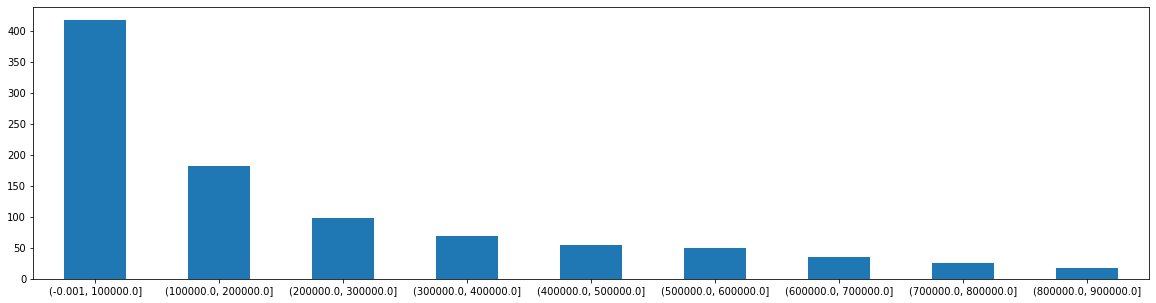

In [14]:
bins_votes = np.arange(0, 1000000, 100000)
votes = pd.cut(df['votes'], bins=bins_votes, include_lowest=True)
ax = votes.value_counts(sort=False).plot.bar(rot=0, figsize=(20,5))
plt.show()

### 14) Conteo de películas agrupada por su categoría

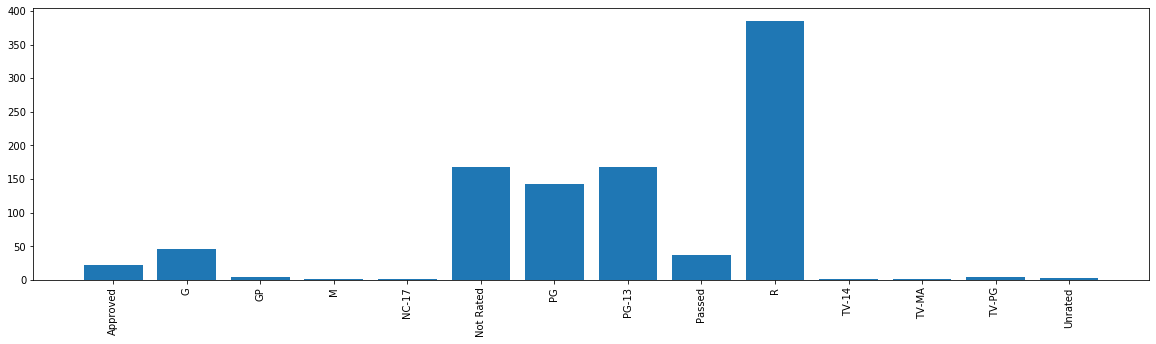

In [15]:
count_categories = df.groupby(['rated'], as_index=True)['name']
fig_14 = plt.figure(figsize=(20,5))
plt.bar(count_categories.count().index , count_categories.count().values)
plt.xticks(rotation=90)
plt.show()

### 15) Conteo de películas agrupadas por su género

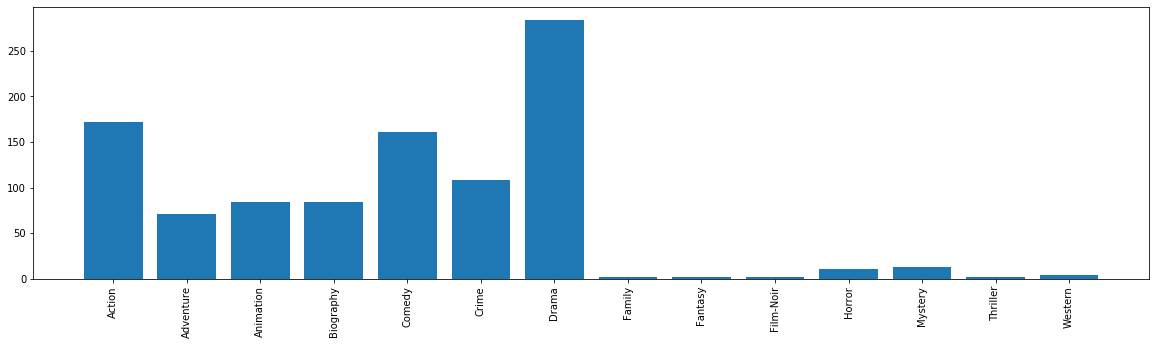

In [16]:
genres = df.groupby(['genre'], as_index=True)['name']
fig_15 = plt.figure(figsize=(20,5))
plt.bar(genres.count().index , genres.count().values)
plt.xticks(rotation=90)
plt.show()

### 16) Porcentaje del total de películas por género

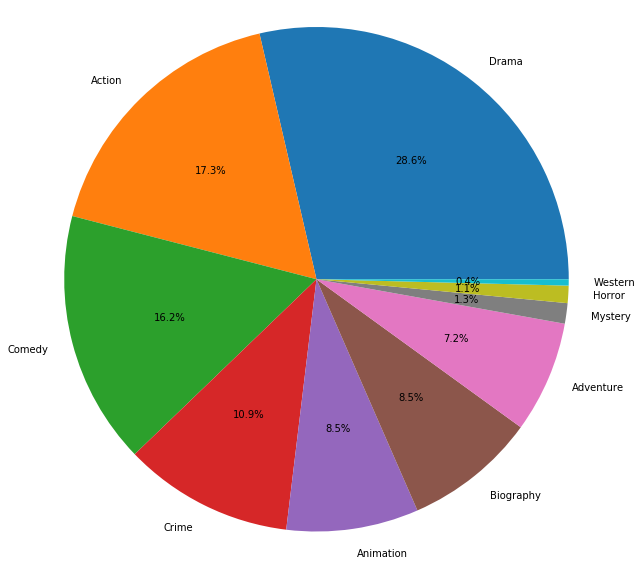

In [17]:
genrs = df['genre'].value_counts().head(10)
fig_16 = plt.figure(figsize=(10,10))
plt.pie(genrs, labels= genrs.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### 17) Top 15 de películas de acción
Top de 15 de películas de acción según su rating.

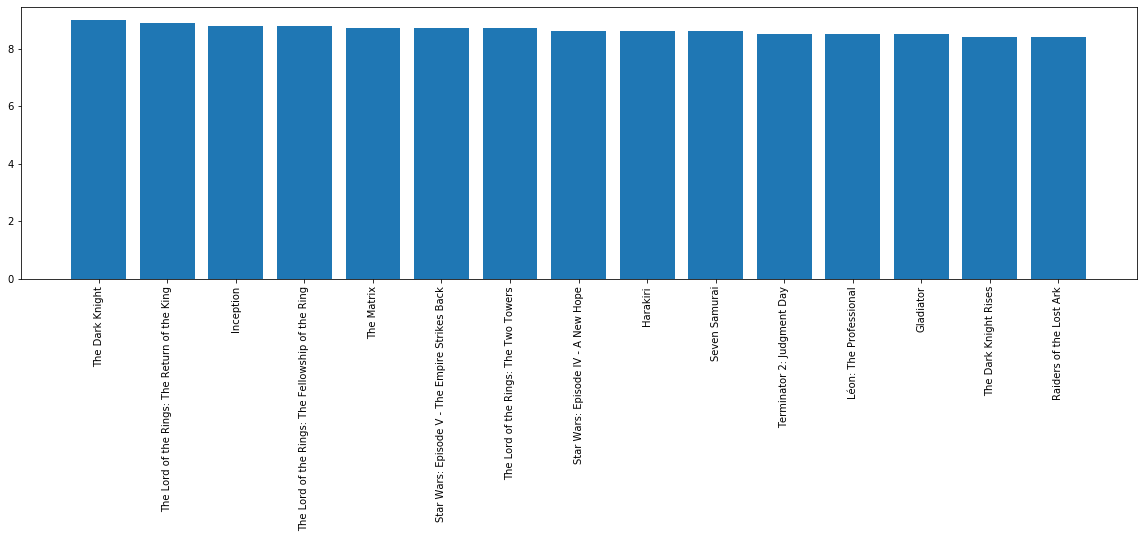

In [18]:
action = df.loc[df['genre'] == 'Action'].sort_values(by='rating', ascending=False).head(15)
fig_17 = plt.figure(figsize=(20,5))
plt.bar(action['name'].values ,action['rating'].values )
plt.xticks(rotation=90)
plt.show()

### 18) Top 15 de películas de drama
Top 15 de películas de drama según su metascore.

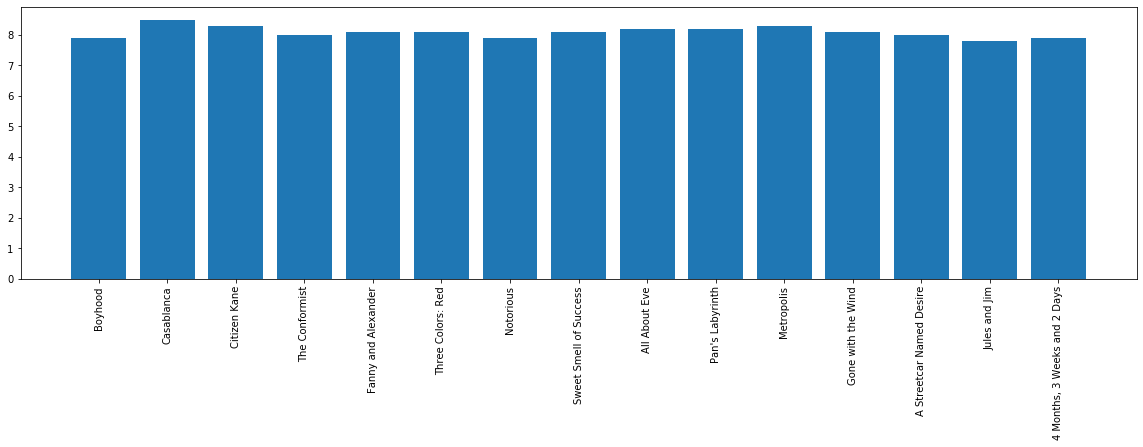

In [19]:
drama = df.loc[df['genre'] == 'Drama'].sort_values(by='metascore', ascending=False).head(15)
fig_18 = plt.figure(figsize=(20,5))
plt.bar(drama['name'].values ,drama['rating'].values )
plt.xticks(rotation=90)
plt.show()

### 19) Películas de Alfred Hitchcock según su año de lanzamiento
Conteo de películas de Alfred Hitchcock agrupadas por año de lanzamiento

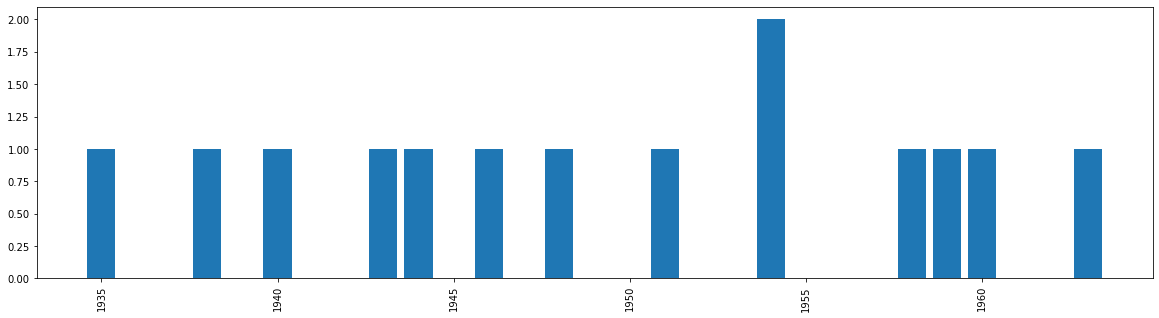

In [20]:
alfred_hitchcock = df.loc[df['director'] == 'Alfred Hitchcock'].groupby(by='year', as_index=True)['year']
fig_19 = plt.figure(figsize=(20,5))
plt.bar(alfred_hitchcock.count().index , alfred_hitchcock.count().values)
plt.xticks(rotation=90)
plt.show()

### 20) Películas de Christopher Nolan según su género
Porcentaje de películas de Christopher Nolan agrupadas según su género

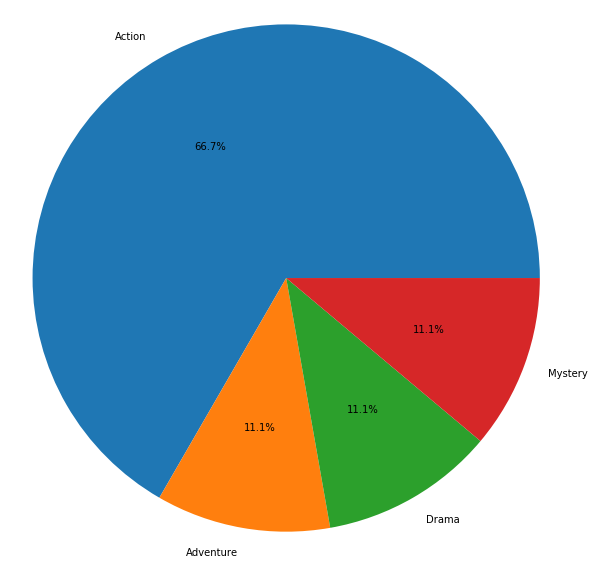

In [21]:
nolan = df.loc[df['director'] == 'Christopher Nolan'].groupby(by='genre').count()['name']
fig_20 = plt.figure(figsize=(10,10))
plt.pie(nolan, labels= nolan.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()